<a href="https://colab.research.google.com/github/roysayan96/Deep_learning/blob/main/DL_assessment4_Q2_20mai0008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Github link: https://github.com/roysayan96/Deep_learning/blob/main/DL_assessment4_Q2_20mai0008.ipynb

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import all libraries
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [17]:
train_path = '/content/drive/MyDrive/SET-chest - Copy/TRAIN'
valid_path = '/content/drive/MyDrive/SET-chest - Copy/TEST'

In [18]:

# re-size all the images to this
IMAGE_SIZE = [224, 224]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [19]:
for layer in vgg.layers:
  layer.trainable = False

In [20]:
folders = glob('/content/drive/MyDrive/SET-chest - Copy/TRAIN/*')
print(folders)

['/content/drive/MyDrive/SET-chest - Copy/TRAIN/cov19', '/content/drive/MyDrive/SET-chest - Copy/TRAIN/pneumonia']


In [21]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [22]:
model = Model(inputs=vgg.input, outputs=prediction)

In [23]:

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [24]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='sgd',
  metrics=['accuracy']
)

In [27]:
# Image Augmentation 
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/SET-chest - Copy/TRAIN',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/SET-chest - Copy/TEST',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 195 images belonging to 2 classes.
Found 111 images belonging to 2 classes.


In [28]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
7/7 [==============================] - 97s 14s/step - loss: 15.3331 - accuracy: 0.4769 - val_loss: 18.3116 - val_accuracy: 0.4955
Epoch 2/5
7/7 [==============================] - 8s 1s/step - loss: 10.5686 - accuracy: 0.5692 - val_loss: 14.7428 - val_accuracy: 0.5045
Epoch 3/5
7/7 [==============================] - 8s 1s/step - loss: 11.2034 - accuracy: 0.5641 - val_loss: 15.7000 - val_accuracy: 0.5045
Epoch 4/5
7/7 [==============================] - 8s 1s/step - loss: 13.8112 - accuracy: 0.4821 - val_loss: 27.1209 - val_accuracy: 0.4955
Epoch 5/5
7/7 [==============================] - 8s 1s/step - loss: 11.3233 - accuracy: 0.6462 - val_loss: 12.0618 - val_accuracy: 0.5045


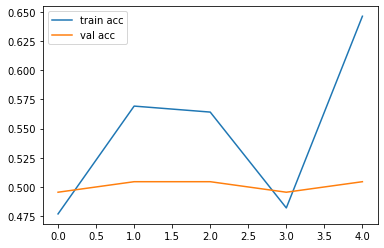

<Figure size 432x288 with 0 Axes>

In [29]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

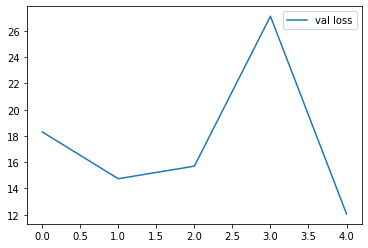

<Figure size 432x288 with 0 Axes>

In [30]:
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')